Mounted at /content/gdrive


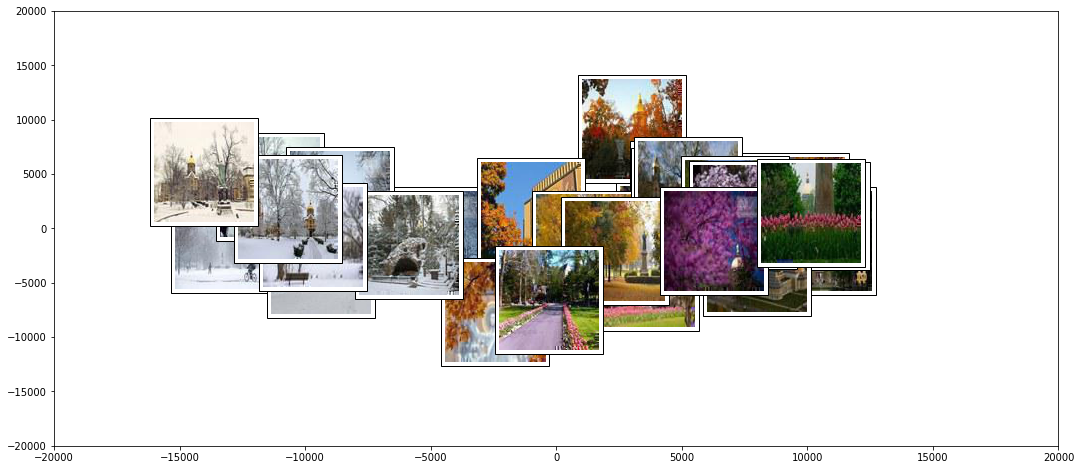

Before PCA, n = 1 0.7666666666666667
Before PCA, n = 3 0.7333333333333333
After PCA, n = 1 0.6
After PCA, n = 3 0.5333333333333333


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from numpy import asarray
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection  
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
import scipy
import skimage.transform as st

def main():
  # img = []
  seasons = [] 
  img, seasons = loadImages('/content/gdrive/MyDrive/ML2')
  w, images = PCA_ImageSpaceVisualization(img)
  classification_accurancy(img, w, seasons)

#1.1
def loadImages(path):
  images = []
  seasons = []
  for filename in os.listdir(path):
    im = Image.open(os.path.join(path, filename))
    im = im.resize((100,100))
    im = np.asarray(im)
    im.reshape(-1)
    im = im.flatten()
    images.append(im)
    if (filename[0] == 'W'):
      seasons.append(0)
    elif (filename[0] == 'F'):
      seasons.append(1)
    elif (filename[0] == 'S'):
      seasons.append(2)
  images = np.asarray(images)
  images = np.stack(images,axis=1)
  return images, seasons  

#1.2
def PCA_ImageSpaceVisualization(X):    
    
    X_meaned = []     
    for i in range(30000):         
      X_meaned.append([np.mean(X[i,:])])     
    Xmean = np.array(X_meaned)
    X_ready = X - Xmean

    cov_mat = np.cov(X_ready)

    eigValue,eigVector = scipy.sparse.linalg.eigsh(cov_mat)

    aDict = {}
    selectededEigenVectors = []
    for a in zip(eigValue,eigVector.T):
        aDict[abs(a[0])]=a[1]
    n=0
    for aKey in sorted(aDict,reverse=True): 
        n+=1
        selectededEigenVectors+=[aDict[aKey].reshape(30000,1)] 
        if n==2:
            break
    w=np.hstack(selectededEigenVectors)
    w = (w.T).dot(X_ready)
    w = w.T
    temp = np.stack(X,axis=1)

    array_of_pictur =[]  
    for array in temp:
      array_of_pictur.append(array.reshape((100,100,3)))
    array_of_pictur = np.array(array_of_pictur)

    fig = plt.figure(figsize=(18, 8))
    ax = plt.subplot()
    for i in range(30):
        imagebox = OffsetImage(array_of_pictur[i])
        XY = w[i]
        ab = AnnotationBbox(imagebox, XY)
        ax.add_artist(ab)

    ax.set_xlim(-20000,20000)
    ax.set_ylim(-20000,20000)
    plt.draw()
    plt.show()
    return w, array_of_pictur 

#1.5.1
def classification_accurancy(beforePCA, afterPCA, seasons):
    image = np.stack(beforePCA, axis=1)
    array = cross_val_score(KNeighborsClassifier(n_neighbors=1),image, seasons, cv=KFold(n_splits=5), scoring='accuracy')
    value1 = np.mean(array)
    print("Before PCA, n = 1", value1)

    array = cross_val_score(KNeighborsClassifier(n_neighbors=3),image, seasons, cv=KFold(n_splits=5), scoring='accuracy')
    value1 = np.mean(array)
    print("Before PCA, n = 3",value1)

    image = afterPCA
    array = cross_val_score(KNeighborsClassifier(n_neighbors=1),image, seasons, cv=KFold(n_splits=5), scoring='accuracy')
    value1 = np.mean(array)
    print("After PCA, n = 1",value1)

    array = cross_val_score(KNeighborsClassifier(n_neighbors=3),image, seasons, cv=KFold(n_splits=5), scoring='accuracy')
    value1 = np.mean(array)
    print("After PCA, n = 3",value1)


if __name__ == "__main__":
  main()

Σημείωση: Η συνάρτηση load_images παίρνει τις εικόνες από το google drive από ένα αρχείο με όνομα ML2. 

#1.3
Το γεγονός ότι 2 εικόνες βρίσκονται πολύ κοντά στο παραπάνω plot σημαίνει πως έχουν παρόμοιο χρώμα. Αντίστοιχα αν δυο εικόνες στο plot βρίσκονται πολύ μακριά αυτό σημαίνει πως δεν έχουν καθόλου παρόμοιο χρώμα. \ \
Αν και αυτό φαίνεται να ισχύει στις διαστάσεις που μελετάμε εμείς δεν μπορούμε να το γενικεύσουμε σε περισσότερες διαστάσεις.

#1.4
Οι εικόνες που ανήκουν σε μία εποχή τείνουν να ομαδοποιούνται πιο κοντά καθώς έχουν σε γενικές γραμμές παρόμοια χρώματα επομένως ισχύει αυτό που προαναφέραμε στο 1.3

In [ ]:
#1.5.2

# Import PCA for some indicative results
from sklearn.decomposition import PCA
  
# Keep 30 components
n_components = 30 
X=images[0]
pca = PCA(n_components=n_components).fit(X)

components = pca.transform(X) ## tranform the data to the new axes system

cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 10))
numOfComp=10
plt.subplot(2, 2, 1)
plt.bar(range(numOfComp),pca.explained_variance_ratio_[:numOfComp])
plt.xlabel(' components ')
plt.ylabel(' explained variance');


plt.subplot(2, 2, 2)
plt.plot(cumExplainedVar[:10])
plt.xlabel('number of components retained (10 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 3)
plt.plot(cumExplainedVar[:50])
plt.xlabel('number of components retained (50 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 4)
plt.plot(cumExplainedVar)
plt.xlabel('number of components retained (200)')
plt.ylabel('cumulative explained variance');

plt.show()

Ο παραπάνω κώδικας έχει παρθεί από τις σημειώσεις του εργαστηρίου

#2.1

Από την εκφώνηση έχουμε ότι: $ min_{A,B}(||X-AB||_{2}^{F} + λ||Α|||_{2}^{F}), Α \geq 0, B \geq 0 $ \\
Στόχος μας είναι η ελαχιστοποίηση της παραπάνω εξίσωσης. \\
Από γνωστή θεωρία (matrix cookbook) έχουμε ότι: \\
$ ||X-AB||_{2}^{F} = (\sqrt{Trace((X - AB)(X - AB)^T)})^2 (1) \\ $  
Συνεπώς: \\
$ ||X-AB||_{2}^{F} = \\ 
Trace((X - AB)(X - AB)^T) = \\
Trace((X - AB)(X^Τ - A^ΤB^Τ) = \\
Trace(X^TX -X^TAB - XA^TB^T - A^TB^TAB) $ \\  
Και από γνωστές ιδιότητες έχουμε: \\ 
$ ||X-AB||_{2}^{F} = Trace(X^TX) - Trace(X^TAB) - Trace(XA^TB^T) - Trace(A^TB^TAB) $ \\
Τώρα πρέπει να εξετάσοyμε και το 2ο μέλος της αρχικής μας εξίσωσης. \\
Από γνωστή θεωρία έχουμε: \\
$ λ||Α|||_{2}^{F} = λ*Trace(A^TA) $ \\
Άρα συνολικά έχουμε: \\
$ min_{A,B}(||X-AB||_{2}^{F} + λ||Α|||_{2}^{F}) = \\
min( Trace(X^TX) - Trace(X^TAB) - Trace(XA^TB^T) - Trace(A^TB^TAB) + λ*Trace(A^TA))$ \\
Στη συνέχεια πρέπει να παραγωγίσουμε την παραπάνω σχέση έστω g ως προς Α και ως προς Β ξεχωριστά. Ξεκινάμε ως προς Α: \\
$ \bigtriangledown(g) = (\bigtriangledown(Trace(X^TX)) - \bigtriangledown(Trace(X^TAB)) - \bigtriangledown(Trace(XA^TB^T)) - \bigtriangledown(Trace(A^TB^TAB)) + \bigtriangledown(λTrace(A^TA))) \\
\bigtriangledown(g) = 0 - XB^T - XB^T + λ2Α + Trace(A^TB^TAB) $ \\
Για το $ \bigtriangledown(Trace(A^TB^TAB)) $ ισχύει: \\
Θέτουμε: K = BB^T και από γνωστές ιδιότητες παίρνουμε: \\
$ \bigtriangledown(Trace(A^TB^TAB)) = \bigtriangledown(Trace(A^TKΑ)) = Α(Κ + Κ^Τ) = \\
Α(ΒΒ^Τ + (ΒΒ^Τ)^Τ) = Α(ΒΒ^Τ + Β^ΤΒ) = 2ΑΒΒ^Τ $ 

Άρα: $ \bigtriangledown(g) = 0 - XB^T - XB^T + λ2Α + Trace(A^TB^TAB) = \\ 
\bigtriangledown(0 - XB^T - XB^T + λ2Α + 2ΑΒΒ^Τ) = \\ 
-2ΧΒ^Τ + Α(2ΒΒ^Τ + 2λ) $ \\
Όμοια για την παράγωγο του Β και παραλείποντας τις πράξεις έχουμε: \\
$ \bigtriangledown(g) = -2Α^ΤΧ + 2Α^ΤΑΒ $ \\
Συνεπώς από τον αλγόριθμο gradient descent έχουμε ότι: \\
$ Α = Α - a(-2XB^T + 2ABB^T) $ \\
$ B = B - a(-2A^TX + 2AA^TB) $ \\
Καθότι θεωρούμε από θεωρία ικανή και αναγκαία συνθήκη το lerning rate να είναι θετικό έχουμε: a > 0 \\
Συνεπώς: \\
$ a = \frac{X}{\bigtriangledown(g^{+})} $ \\
Άρα: \\
$ A = A - \frac{A}{A(2B^TB + 2λ)}*(-2ΧΒ^Τ + A(2BB^T + 2λ)) = \\
Α - Α + \frac{Α*2ΧΒ^Τ}{2Α(ΒΒ^Τ + 2λ)} = \frac{Α*ΧΒ^Τ}{ΑΒΒ^Τ + λΑ} $ \\
$ Β = Β - \frac{A}{2Α^ΤΑΒ}*(-2ΧΑ^Τ + 2Α^ΤΑΒ) = \\
Β - Β + \frac{2Β*Α^ΤΧ}{2Α^ΤΑΒ} = \frac{Β*Α^ΤΧ}{Α^ΤΑΒ} $ \\
ΣΗΜΕΙΩΣΗ: Όπου υπάρχει το σύμβολο * αναφερόμαστε στον πολλαπλασιασμό στοιχείο \\ στοιχείο και ΟΧΙ στο εσωτερικό γινόμενο. \\

In [13]:
#2.2

import numpy as np
from numpy import random

random.seed(173)

def A_new(A, B, X, l):
  A_temp_up = X.dot(B.T) #inner product 
  A_temp_up = A_temp_up*A #element wise
  A_temp_down = A.dot(B)
  A_temp_down = A_temp_down.dot(B.T)
  A_temp_down = A_temp_down + l*A
  A_temp = A_temp_up/A_temp_down
  return A_temp

def B_new(A, B, X):
  B_temp_up = A.T.dot(X) #inner product
  B_temp_up = B_temp_up*B #element wise
  B_temp_down = A.T.dot(A)
  B_temp_down = B_temp_down.dot(B)
  B_temp = B_temp_up/B_temp_down
  return B_temp

def RegNMF(X, k, l, e):
  A = random.randint(random.randint(0, 1000), size=(500,k))
  B = random.randint(random.randint(0, 1000), size=(k, 500))
  while (True):
    A_n = A_new(A, B, X, l)
    B_n = B_new(A, B, X)
    A1_norm = np.linalg.norm(X - A.dot(B))**2
    A2_norm = np.linalg.norm(X - A_n.dot(B_n))**2
    X_norm = np.linalg.norm(X)**2
    res = (A1_norm - A2_norm)/X_norm
    if (res <= e):
      break
    A = A_n
    B = B_n
  return A, B


In [2]:
d = 10
N = 500
W = random.randint(random.randint(0, 1000), size=(N,d))
H = random.randint(random.randint(0, 1000), size=(d, N))
X = W.dot(H)

In [14]:
A, B = RegNMF(X, 5, 0.5, 0.1)
print(A, B)
A, B = RegNMF(X, 5, 0.5, 0.01)
print(A, B)
A, B = RegNMF(X, 5, 0.5, 0.001)
print(A, B)

[[ 28 203  13  96 107]
 [ 34  57  93  89 107]
 [147  65 214 179  92]
 ...
 [ 72  64 171 136 107]
 [146  35 170  31  28]
 [133  81 101 189 116]] [[  7  57  95 ...  39  99  74]
 [ 36   7  41 ...  94  57  69]
 [ 53  57  26 ...  85  87  72]
 [ 87  54  63 ...  43  76  30]
 [  6  83  13 ... 100  55  55]]
[[198 157  34 172   4]
 [167  87 135  48  41]
 [108 155  80 166 116]
 ...
 [187  30 194 126  29]
 [ 81  32 113  32  16]
 [ 11  44 180 141  78]] [[482  41 394 ...  31 432 782]
 [266 226 681 ... 781 865 400]
 [383 358 634 ... 666 272  57]
 [740 789 425 ... 692 686 313]
 [215   4 262 ... 450   7 503]]
[[ 1  3  4  8 14]
 [ 9  1  9  3  7]
 [ 4  9  1  9 15]
 ...
 [ 2 16  1  1  0]
 [ 0 11 16 16 18]
 [12 11 18 17 11]] [[ 52 119 155 ... 312 216   9]
 [136  41 135 ...  51  39   3]
 [ 92  82 247 ... 181 310 287]
 [176 207  96 ... 245 147 212]
 [118 226 118 ... 100  86 296]]


In [15]:
A, B = RegNMF(X, 10, 0.5, 0.1)
print(A, B)
A, B = RegNMF(X, 10, 0.5, 0.01)
print(A, B)
A, B = RegNMF(X, 10, 0.5, 0.001)
print(A, B)

[[ 59.49766975  41.66719761 150.79850342 ...  63.03071008  53.48946444
   37.16548383]
 [125.34124103 187.61113303  81.53329033 ... 107.18668691 150.77157892
  132.56298109]
 [  6.22478006  83.93767648 222.0899662  ... 205.06126936 231.54925884
  166.87724457]
 ...
 [ 58.52174675  73.49773574 233.42763664 ... 182.92847294  91.93437736
   87.31028138]
 [  8.2316689   86.61407422 190.98442082 ... 192.71244281  36.95307583
   77.7938238 ]
 [ 15.81399489  76.18003937 133.88508829 ...  85.22142151 133.08493872
   49.54884139]] [[167.03657491 266.2959156   34.993561   ... 266.31486822  42.65269258
   79.83939401]
 [124.83495939  13.67101123  16.42484707 ...  24.47030531  61.47660635
  147.30947872]
 [194.06594747 175.4521706  167.64306649 ...  29.52038644  74.42507429
  155.82366986]
 ...
 [157.56857215 164.11130592  52.52061493 ... 129.04696484  53.46585712
  192.03064662]
 [140.52511743  65.91439618 266.46980391 ... 343.6391256   83.24771553
  153.780806  ]
 [ 99.72096447 112.77771052 241.

In [16]:
A, B = RegNMF(X, 50, 0.5, 0.1)
print(A, B)
A, B = RegNMF(X, 50, 0.5, 0.01)
print(A, B)
A, B = RegNMF(X, 50, 0.5, 0.001)
print(A, B)

[[ 24.61478269  27.68692143  28.67180008 ...   6.41840305  14.24024165
    2.66972847]
 [ 57.0589791    8.66475775  42.34286634 ...  74.89146295  32.17960397
   75.67944277]
 [109.10255565  23.84068494  57.75613701 ... 116.86467876  83.03394711
   38.54328786]
 ...
 [ 22.87821769  39.82131636  40.8938704  ...  53.26549198  55.95012387
   48.5841889 ]
 [ 32.00546728  53.57510256   1.35983584 ...  35.23103179  31.25592823
   20.08776387]
 [ 28.59494617   8.91515211   3.13358006 ...  42.28362579   7.39331154
   15.09224292]] [[38.51416279 38.78385508  6.02930612 ... 58.38358384 44.38153098
   4.50035882]
 [41.56542897 56.5241881  33.55068219 ...  7.15861774 13.96531292
  45.68098499]
 [32.91564698 28.1967179   7.07500527 ... 25.36166612  2.82276363
  34.45953529]
 ...
 [13.61229685 27.23182296  1.67326703 ... 23.50332167 32.62775096
   7.58257854]
 [37.68364224 51.5306834  59.70635172 ... 51.6260976  18.40346764
   8.73919278]
 [10.42877207 53.10354842 11.9048601  ... 27.83244662 23.29523